## 데이터 수집

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지
import seaborn as sns
import pandas as pd
import numpy as np 
import scipy.stats as stats
from sklearn import datasets 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb

data_df = pd.read_csv('../../datasets/LetalCarOfContractType.csv')
data_df.head()

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0
3,66423450,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,계약확정,0,없음,5.0,농협은행,정상,60.0,2449.0
4,66423204,멤버십,TAS,렌탈재계약,2019-10-20,12,CMS,K1,66900,해약확정,12,있음,8.0,농협은행,해약,51.0,1942.0


## 데이터 분석

In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 51304 non-null  int64  
 1   type_of_contract   51300 non-null  object 
 2   type_of_contract2  51303 non-null  object 
 3   channel            51304 non-null  object 
 4   datetime           51304 non-null  object 
 5   Term               51304 non-null  int64  
 6   payment_type       51304 non-null  object 
 7   product            51303 non-null  object 
 8   amount             51304 non-null  int64  
 9   state              51304 non-null  object 
 10  overdue_count      51304 non-null  int64  
 11  overdue            51302 non-null  object 
 12  credit rating      42521 non-null  float64
 13  bank               48544 non-null  object 
 14  cancellation       51279 non-null  object 
 15  age                40509 non-null  float64
 16  Mileage            405

In [4]:
numeric_df = data_df.select_dtypes(exclude=['object'])
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             51304 non-null  int64  
 1   Term           51304 non-null  int64  
 2   amount         51304 non-null  int64  
 3   overdue_count  51304 non-null  int64  
 4   credit rating  42521 non-null  float64
 5   age            40509 non-null  float64
 6   Mileage        40509 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 2.7 MB


## 데이터 전처리 

In [5]:
# NaN이 없는 레코드들을 train_df로
train_df = numeric_df.dropna()

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40509 entries, 0 to 51303
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             40509 non-null  int64  
 1   Term           40509 non-null  int64  
 2   amount         40509 non-null  int64  
 3   overdue_count  40509 non-null  int64  
 4   credit rating  40509 non-null  float64
 5   age            40509 non-null  float64
 6   Mileage        40509 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 2.5 MB


In [7]:
# NaN이 있는 레코드들을 test_df로
test_df = numeric_df[numeric_df.isna().any(axis=1)]

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10795 entries, 7 to 51299
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10795 non-null  int64  
 1   Term           10795 non-null  int64  
 2   amount         10795 non-null  int64  
 3   overdue_count  10795 non-null  int64  
 4   credit rating  2012 non-null   float64
 5   age            0 non-null      float64
 6   Mileage        0 non-null      float64
dtypes: float64(3), int64(4)
memory usage: 674.7 KB


## 모델 학습 

In [9]:
# # age 찾기 
# # lgbm_model = lgb.LGBMRegressor()
# randomForest = RandomForestRegressor() # 여러개의 트리로 구성
# randomForest.fit(X=train_df.iloc[:,:-1],y=train_df['target']) 
# randomForest.score(X=train_df.iloc[:,:-1],y=train_df['target'])
# predict_diabetes = randomForest.predict(train_df.iloc[:,:-1][:5])
# train_df['target'][:5]
# predict_diabetes = randomForest.predict(train_df.iloc[:,:-1])
# len(predict_diabetes), len(train_df['target'])
# mean_squared_error(y_true=train_df['target'], y_pred=predict_diabetes)
# r2_score(y_true=train_df['target'], y_pred=predict_diabetes)


In [10]:
def train_model(df, target_column, model=RandomForestRegressor()):
    """
    주어진 데이터프레임과 타겟 컬럼, 모델로 학습을 수행하고 평가 지표를 반환하는 함수
    
    Parameters:
    df : DataFrame - 학습에 사용할 데이터프레임
    target_column : str - 예측하고자 하는 타겟 컬럼명
    model : sklearn model object - 학습에 사용할 모델 (기본값: RandomForestRegressor)
    
    Returns:
    dict - 모델 성능 평가 결과
    """
    
    # 특성과 타겟 분리
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    # 모델 학습
    model.fit(X, y)
    
    # 예측
    predictions = model.predict(X)
    
    # 평가 지표 계산
    results = {
        'model_name': model.__class__.__name__,
        'r2_score': r2_score(y_true=y, y_pred=predictions),
        'mse': mean_squared_error(y_true=y, y_pred=predictions),
        'model_score': model.score(X, y)
    }
    
    return results, model

In [11]:
rf_results, rf_model = train_model(train_df, 'age')

In [12]:
target = 'age'
# NaN이 없는 컬럼만 선택 (현재 타겟 제외)
available_columns = [col for col in numeric_df.columns 
                   if col != target and numeric_df[col].isnull().sum() == 0]

# 테스트 데이터: 타겟이 NaN인 데이터
test_mask = numeric_df[target].isna()
test_df = numeric_df.loc[test_mask, available_columns]
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10795 entries, 7 to 51299
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   id             10795 non-null  int64
 1   Term           10795 non-null  int64
 2   amount         10795 non-null  int64
 3   overdue_count  10795 non-null  int64
dtypes: int64(4)
memory usage: 421.7 KB


In [13]:
def predict_multiple_targets(numeric_df, models, target_columns):
    """
    여러 모델과 타겟에 대해 예측을 수행하는 함수
    
    Parameters:
    numeric_df : DataFrame - 원본 데이터프레임
    models : dict - 모델 이름과 모델 객체의 딕셔너리
    target_columns : list - 예측할 타겟 컬럼들의 리스트
    
    Returns:
    dict - 각 모델과 타겟별 결과를 담은 딕셔너리
    """
    results = {}
    predictions = {}
    trained_models = {}
    
    for model_name, model in models.items():
        results[model_name] = {}
        predictions[model_name] = {}
        trained_models[model_name] = {}
        
        for target in target_columns:
            # NaN이 없는 컬럼만 선택
            available_columns = [col for col in numeric_df.columns 
                               if col != target and numeric_df[col].isnull().sum() == 0]
            
            # 학습 데이터: 타겟 값이 있는 데이터
            train_df = numeric_df[available_columns + [target]].dropna()
            
            # 테스트 데이터: 타겟이 NaN인 데이터
            test_mask = numeric_df[target].isna()
            test_df = numeric_df.loc[test_mask, available_columns]
            
            if len(train_df) > 0 and len(test_df) > 0:
                # 모델 학습
                result, trained_model = train_model(train_df, target, model=model)
                
                # 예측
                pred = trained_model.predict(test_df)
                
                # 결과 저장
                results[model_name][target] = result
                predictions[model_name][target] = pred
                trained_models[model_name][target] = trained_model
                
                print(f"\nModel: {model_name}, Target: {target}")
                print(f"Training Results:")
                print(f"R2 Score: {result['r2_score']:.4f}")
                print(f"MSE: {result['mse']:.4f}")
                print(f"Predictions shape: {pred.shape}")
    
    return results, predictions, trained_models

In [14]:
# 사용 예시:
# 모델 정의
models = {
    'RandomForest': RandomForestRegressor(),
    'SVR': SVR(),
    'LinearRegression': LinearRegression()
}

# 타겟 컬럼 정의
target_columns = ['age', 'Mileage', 'credit rating']

# 예측 수행
results, predictions, trained_models = predict_multiple_targets(numeric_df, models, target_columns)



Model: RandomForest, Target: age
Training Results:
R2 Score: 0.6482
MSE: 63.7928
Predictions shape: (10795,)

Model: RandomForest, Target: Mileage
Training Results:
R2 Score: 0.6474
MSE: 67249.2871
Predictions shape: (10795,)

Model: RandomForest, Target: credit rating
Training Results:
R2 Score: 0.7425
MSE: 1.2618
Predictions shape: (8783,)

Model: SVR, Target: age
Training Results:
R2 Score: -0.0028
MSE: 181.8300
Predictions shape: (10795,)

Model: SVR, Target: Mileage
Training Results:
R2 Score: -0.0025
MSE: 191184.7170
Predictions shape: (10795,)

Model: SVR, Target: credit rating
Training Results:
R2 Score: -0.0571
MSE: 5.1795
Predictions shape: (8783,)

Model: LinearRegression, Target: age
Training Results:
R2 Score: 0.0001
MSE: 181.3143
Predictions shape: (10795,)

Model: LinearRegression, Target: Mileage
Training Results:
R2 Score: 0.0001
MSE: 190695.0351
Predictions shape: (10795,)

Model: LinearRegression, Target: credit rating
Training Results:
R2 Score: 0.0427
MSE: 4.6908


## 모델 평가 

#### 결과 평가
- 동시에 비어 있는 컬럼이 있으며, 서로 단위 크기가 달라서 잘 예측하지 못하는 것으로 보임.
- R2 스코어 비교 
+ min -25.0269 (RandomForest - Mileage)
+ max 0.7425 (RandomForest - credit rating) 

- 개선 할 사항: 
+ 단위 맞추기
+ 학습을 단계적으로 하기
+ 동시에 Nan 인 경우, 추정치를 이용해서 추론하기

- coef를 확인 안했네

In [15]:
def fill_missing_values(numeric_df, trained_models):
    """
    학습된 모델들을 사용하여 결측치를 채우는 함수
    
    Parameters:
    numeric_df : DataFrame - 원본 데이터프레임
    trained_models : dict - 학습된 모델들의 딕셔너리
    
    Returns:
    DataFrame - 결측치가 채워진 데이터프레임
    """
    # 결과를 저장할 데이터프레임 복사
    filled_df = numeric_df.copy()
    
    # 각 모델과 타겟에 대해 예측 수행
    for model_name, target_models in trained_models.items():
        for target, model in target_models.items():
            # NaN이 없는 컬럼만 선택
            available_columns = [col for col in numeric_df.columns 
                               if col != target and numeric_df[col].isnull().sum() == 0]
            
            # 결측치가 있는 행 선택
            mask = numeric_df[target].isna()
            if mask.any():
                # 예측을 위한 데이터 준비
                test_data = numeric_df.loc[mask, available_columns]
                
                # 예측 수행
                predictions = model.predict(test_data)
                
                # 새로운 컬럼 이름 생성 (모델별 예측값 구분)
                new_column = f"{target}_{model_name}"
                
                # 예측값 저장
                filled_df.loc[mask, new_column] = predictions
                
                print(f"Filled {mask.sum()} missing values for {target} using {model_name}")
    
    return filled_df

In [16]:
# 함수 사용
filled_results = fill_missing_values(numeric_df, trained_models)

# 결과 확인
for target in ['age', 'Mileage', 'credit rating']:
    print(f"\nPredictions for {target}:")
    pred_columns = [col for col in filled_results.columns if col.startswith(f"{target}_")]
    if pred_columns:
        print("Original missing values:", numeric_df[target].isna().sum())
        for col in pred_columns:
            print(f"{col} predictions:", filled_results[col].notna().sum())

Filled 10795 missing values for age using RandomForest
Filled 10795 missing values for Mileage using RandomForest
Filled 8783 missing values for credit rating using RandomForest
Filled 10795 missing values for age using SVR
Filled 10795 missing values for Mileage using SVR
Filled 8783 missing values for credit rating using SVR
Filled 10795 missing values for age using LinearRegression
Filled 10795 missing values for Mileage using LinearRegression
Filled 8783 missing values for credit rating using LinearRegression

Predictions for age:
Original missing values: 10795
age_RandomForest predictions: 10795
age_SVR predictions: 10795
age_LinearRegression predictions: 10795

Predictions for Mileage:
Original missing values: 10795
Mileage_RandomForest predictions: 10795
Mileage_SVR predictions: 10795
Mileage_LinearRegression predictions: 10795

Predictions for credit rating:
Original missing values: 8783
credit rating_RandomForest predictions: 8783
credit rating_SVR predictions: 8783
credit rat

In [17]:
filled_results.head()

,id,Term,amount,overdue_count,credit rating,age,Mileage,age_RandomForest,Mileage_RandomForest,credit rating_RandomForest,age_SVR,Mileage_SVR,credit rating_SVR,age_LinearRegression,Mileage_LinearRegression,credit rating_LinearRegression
0,66758234,60,96900,0,9.0,43.0,1862.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,66755948,60,102900,0,2.0,62.0,2532.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,66756657,60,96900,0,8.0,60.0,2363.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,66423450,12,66900,0,5.0,60.0,2449.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,66423204,12,66900,12,8.0,51.0,1942.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
filled_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              51304 non-null  int64  
 1   Term                            51304 non-null  int64  
 2   amount                          51304 non-null  int64  
 3   overdue_count                   51304 non-null  int64  
 4   credit rating                   42521 non-null  float64
 5   age                             40509 non-null  float64
 6   Mileage                         40509 non-null  float64
 7   age_RandomForest                10795 non-null  float64
 8   Mileage_RandomForest            10795 non-null  float64
 9   credit rating_RandomForest      8783 non-null   float64
 10  age_SVR                         10795 non-null  float64
 11  Mileage_SVR                     10795 non-null  float64
 12  credit rating_SVR               

In [23]:
# age가 NaN인 행만 필터링하고, 관련 컬럼만 선택
age_nan_mask = numeric_df['credit rating'].isna()
age_predictions = filled_results[age_nan_mask][['credit rating',
                                                'credit rating_RandomForest',
                                                'credit rating_SVR',
                                                'credit rating_LinearRegression']]

# 결과 확인
print("Sample of predictions for missing age values:")
print(age_predictions.head())

# 기본 통계량 확인
print("\nStatistics of predictions:")
print(age_predictions.describe())

Sample of predictions for missing age values:
    credit rating  credit rating_RandomForest  credit rating_SVR  \
26            NaN                        3.11           2.900048   
27            NaN                        2.37           1.898483   
29            NaN                        1.28           1.899749   
32            NaN                        3.84           1.899815   
34            NaN                        3.76           1.903590   

    credit rating_LinearRegression  
26                        3.335551  
27                        2.618770  
29                        2.097214  
32                        2.201177  
34                        2.544315  

Statistics of predictions:
       credit rating  credit rating_RandomForest  credit rating_SVR  \
count            0.0                 8783.000000        8783.000000   
mean             NaN                    3.688680           2.330991   
std              NaN                    1.485352           0.495194   
min        

In [22]:
# age가 NaN인 행만 필터링하고, 관련 컬럼만 선택
age_nan_mask = numeric_df['Mileage'].isna()
age_predictions = filled_results[age_nan_mask][['Mileage',
                                              'Mileage_RandomForest',
                                              'Mileage_SVR',
                                              'Mileage_LinearRegression']]

# 결과 확인
print("Sample of predictions for missing age values:")
print(age_predictions.head())

# 기본 통계량 확인
print("\nStatistics of predictions:")
print(age_predictions.describe())

Sample of predictions for missing age values:
    Mileage  Mileage_RandomForest  Mileage_SVR  Mileage_LinearRegression
7       NaN                 1.500     2.900426                  3.388325
19      NaN                 6.904     2.900343                  3.305193
21      NaN                 1.760     2.900411                  3.368678
26      NaN                 3.110     2.900048                  3.335551
27      NaN                 2.370     1.898483                  2.618770

Statistics of predictions:
       Mileage  Mileage_RandomForest   Mileage_SVR  Mileage_LinearRegression
count      0.0          10795.000000  10795.000000              10795.000000
mean       NaN              3.638588      2.437098                  2.986693
std        NaN              1.510147      0.498660                  0.810232
min        NaN              0.070000      1.897861                  1.816865
25%        NaN              2.430000      1.899746                  2.217021
50%        NaN            

In [24]:
# age가 NaN인 행만 필터링하고, 관련 컬럼만 선택
age_nan_mask = numeric_df['age'].isna()
age_predictions = filled_results[age_nan_mask][['age',
                                              'age_RandomForest',
                                              'age_SVR',
                                              'age_LinearRegression']]

# 결과 확인
print("Sample of predictions for missing age values:")
print(age_predictions.head())

# 기본 통계량 확인
print("\nStatistics of predictions:")
print(age_predictions.describe())

Sample of predictions for missing age values:
    age  age_RandomForest   age_SVR  age_LinearRegression
7   NaN             1.500  2.900426              3.388325
19  NaN             6.904  2.900343              3.305193
21  NaN             1.760  2.900411              3.368678
26  NaN             3.110  2.900048              3.335551
27  NaN             2.370  1.898483              2.618770

Statistics of predictions:
       age  age_RandomForest       age_SVR  age_LinearRegression
count  0.0      10795.000000  10795.000000          10795.000000
mean   NaN          3.638588      2.437098              2.986693
std    NaN          1.510147      0.498660              0.810232
min    NaN          0.070000      1.897861              1.816865
25%    NaN          2.430000      1.899746              2.217021
50%    NaN          3.410000      2.899860              3.321526
75%    NaN          4.614464      2.900429              3.588282
max    NaN          9.140000      2.900575              9.

In [ ]:
# age가 NaN인 행만 필터링하고, 관련 컬럼만 선택
age_nan_mask = numeric_df['age'].isna()
age_predictions = filled_results[age_nan_mask][['age',
                                              'age_RandomForest',
                                              'age_SVR',
                                              'age_LinearRegression']]

# 결과 확인
print("Sample of predictions for missing age values:")
print(age_predictions.head())

# 기본 통계량 확인
print("\nStatistics of predictions:")
print(age_predictions.describe())

In [20]:
numeric_df['age'].head()

0    43.0
1    62.0
2    60.0
3    60.0
4    51.0
Name: age, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split

def evaluate_models_with_split(numeric_df, trained_models, test_size=0.2, random_state=42):
    """
    학습된 모델들의 성능을 평가하는 함수
    
    Parameters:
    numeric_df : DataFrame - 원본 데이터프레임
    trained_models : dict - 학습된 모델들의 딕셔너리
    test_size : float - 테스트 셋의 비율
    random_state : int - 랜덤 시드
    
    Returns:
    DataFrame - 실제값과 예측값을 포함한 데이터프레임
    dict - 각 모델의 성능 지표
    """
    evaluation_results = {}
    comparison_dfs = {}
    
    for target in ['age', 'Mileage', 'credit rating']:
        # NaN이 없는 데이터만 선택
        valid_data = numeric_df[numeric_df[target].notna()].copy()
        
        # 사용 가능한 특성 선택
        available_columns = [col for col in numeric_df.columns 
                           if col != target and numeric_df[col].isnull().sum() == 0]
        
        # 데이터 분할
        X = valid_data[available_columns]
        y = valid_data[target]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, 
                                                           random_state=random_state)
        
        # 결과를 저장할 데이터프레임 생성
        comparison_df = pd.DataFrame({'actual': y_test})
        evaluation_results[target] = {}
        
        # 각 모델의 예측 수행
        for model_name, target_models in trained_models.items():
            if target in target_models:
                model = target_models[target]
                
                # 예측
                predictions = model.predict(X_test)
                
                # 예측값 저장
                comparison_df[f'pred_{model_name}'] = predictions
                
                # 스케일링된 예측값으로 성능 평가
                if target == 'age':
                    scaled_predictions = predictions * 10
                    scaled_actual = y_test * 1  # actual은 그대로
                elif target == 'Mileage':
                    scaled_predictions = predictions * 1000
                    scaled_actual = y_test * 1  # actual은 그대로
                else:
                    scaled_predictions = predictions
                    scaled_actual = y_test
                
                # 성능 지표 계산
                evaluation_results[target][model_name] = {
                    'r2_score': r2_score(y_test, scaled_predictions),  # R2 score는 스케일링 영향 없음
                    'mse': mean_squared_error(scaled_actual, scaled_predictions),
                    'original_mse': mean_squared_error(y_test, predictions)
                }
        
        comparison_dfs[target] = comparison_df
        
        # 결과 출력
        print(f"\nEvaluation results for {target}:")
        for model_name, metrics in evaluation_results[target].items():
            print(f"\n{model_name}:")
            print(f"R2 Score: {metrics['r2_score']:.4f}")
            if target == 'age':
                print(f"MSE (scaled x10): {metrics['mse']:.4f}")
                print(f"Original MSE: {metrics['original_mse']:.4f}")
            elif target == 'Mileage':
                print(f"MSE (scaled x1000): {metrics['mse']:.4f}")
                print(f"Original MSE: {metrics['original_mse']:.4f}")
            else:
                print(f"MSE: {metrics['mse']:.4f}")
        
        # 예측값 비교 샘플 출력
        print(f"\nSample predictions for {target}:")
        sample_df = comparison_df.head()
        if target == 'age':
            for col in sample_df.columns:
                if col != 'actual':
                    sample_df[f"{col}_scaled"] = sample_df[col] * 10
        elif target == 'Mileage':
            for col in sample_df.columns:
                if col != 'actual':
                    sample_df[f"{col}_scaled"] = sample_df[col] * 1000
        print(sample_df)
    
    return comparison_dfs, evaluation_results

In [37]:
# 함수 사용
comparison_dfs, evaluation_results = evaluate_models_with_split(numeric_df, trained_models)



Evaluation results for age:

RandomForest:
R2 Score: -2.2010
MSE (scaled x10): 576.9482
Original MSE: 2035.7520

SVR:
R2 Score: -1.7005
MSE (scaled x10): 486.7358
Original MSE: 2081.3380

LinearRegression:
R2 Score: -0.9454
MSE (scaled x10): 350.6437
Original MSE: 2035.1941

Sample predictions for age:
       actual  pred_RandomForest  pred_SVR  pred_LinearRegression  \
45606    34.0           4.331444  2.900412               3.345855   
35330    46.0           4.019321  2.900405               3.345587   
36849    37.0           3.860000  2.900188               3.769846   
6331     65.0           3.508048  2.900389               3.345011   
24278    33.0           3.219000  2.900397               3.345318   

       pred_RandomForest_scaled  pred_SVR_scaled  pred_LinearRegression_scaled  
45606                 43.314444        29.004115                     33.458552  
35330                 40.193214        29.004045                     33.455870  
36849                 38.600000      

/tmp/ipykernel_38423/2536323068.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df[f"{col}_scaled"] = sample_df[col] * 10
/tmp/ipykernel_38423/2536323068.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df[f"{col}_scaled"] = sample_df[col] * 10
/tmp/ipykernel_38423/2536323068.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd


Evaluation results for Mileage:

RandomForest:
R2 Score: -25.0269
MSE (scaled x1000): 4952506.5864
Original MSE: 4037747.3836

SVR:
R2 Score: -4.5925
MSE (scaled x1000): 1064156.4974
Original MSE: 4039920.4353

LinearRegression:
R2 Score: -12.5427
MSE (scaled x1000): 2576965.1355
Original MSE: 4037821.8903

Sample predictions for Mileage:
       actual  pred_RandomForest  pred_SVR  pred_LinearRegression  \
45606  1561.0           4.331444  2.900412               3.345855   
35330  2016.0           4.019321  2.900405               3.345587   
36849  1734.0           3.860000  2.900188               3.769846   
6331   2463.0           3.508048  2.900389               3.345011   
24278  1678.0           3.219000  2.900397               3.345318   

       pred_RandomForest_scaled  pred_SVR_scaled  pred_LinearRegression_scaled  
45606               4331.444444      2900.411513                   3345.855166  
35330               4019.321429      2900.404549                   3345.586956  


/tmp/ipykernel_38423/2536323068.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df[f"{col}_scaled"] = sample_df[col] * 1000
/tmp/ipykernel_38423/2536323068.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df[f"{col}_scaled"] = sample_df[col] * 1000
/tmp/ipykernel_38423/2536323068.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas


Evaluation results for credit rating:

RandomForest:
R2 Score: 0.7475
MSE: 1.2358

SVR:
R2 Score: -0.0551
MSE: 5.1631

LinearRegression:
R2 Score: 0.0491
MSE: 4.6532

Sample predictions for credit rating:
       actual  pred_RandomForest  pred_SVR  pred_LinearRegression
29634     4.0           2.944714  2.900150               3.738781
15387     3.0           3.680000  2.900376               3.329283
8857      3.0           3.550000  2.899680               3.328398
35357     2.0           1.900000  2.899648               3.327855
13351     4.0           3.840000  2.900433               3.384748


findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

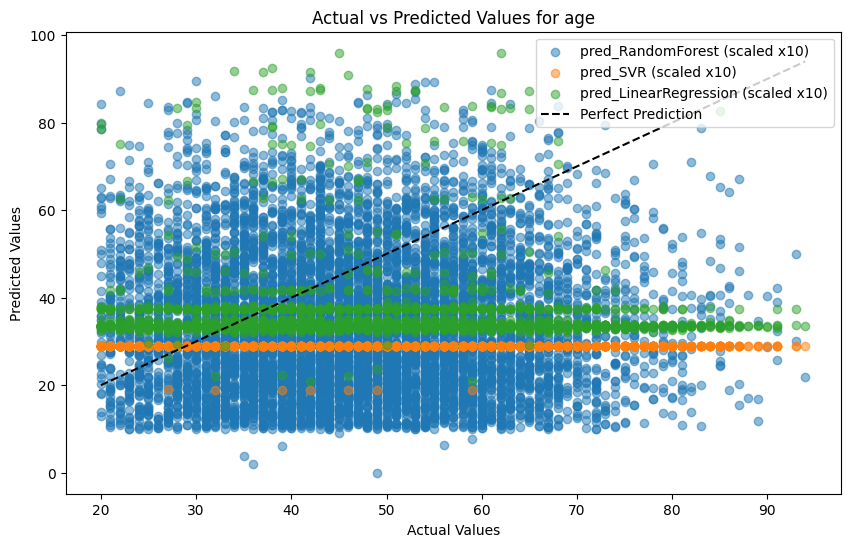

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

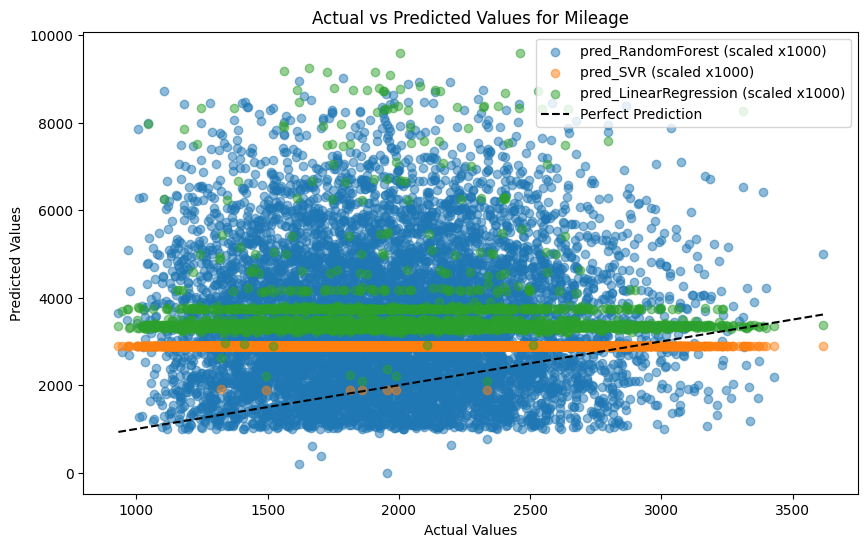

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

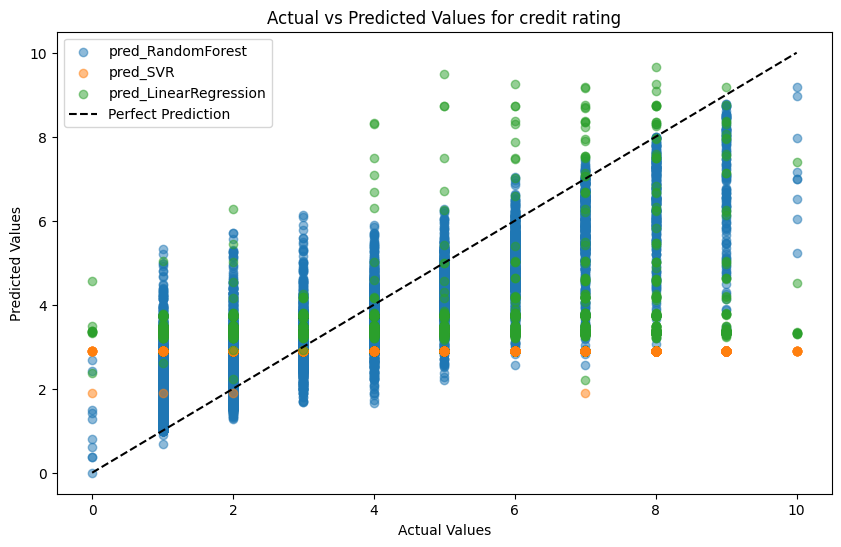

In [33]:
for target, comparison_df in comparison_dfs.items():
    plt.figure(figsize=(10, 6))
    
    if target == 'age':
        # age인 경우 예측값만 10배로 스케일링
        for column in comparison_df.columns:
            if column != 'actual':
                scaled_predictions = comparison_df[column] * 10
                plt.scatter(comparison_df['actual'], scaled_predictions, 
                           alpha=0.5, label=f'{column} (scaled x10)')
    
    elif target == 'Mileage':
        # Mileage인 경우 예측값만 1000배로 스케일링
        for column in comparison_df.columns:
            if column != 'actual':
                scaled_predictions = comparison_df[column] * 1000
                plt.scatter(comparison_df['actual'], scaled_predictions, 
                           alpha=0.5, label=f'{column} (scaled x1000)')
    
    else:
        # 다른 타겟(credit rating)은 스케일링 없음
        for column in comparison_df.columns:
            if column != 'actual':
                plt.scatter(comparison_df['actual'], comparison_df[column], 
                           alpha=0.5, label=column)
    
    # Perfect Prediction 라인은 원래 스케일 유지
    plt.plot([comparison_df['actual'].min(), comparison_df['actual'].max()], 
             [comparison_df['actual'].min(), comparison_df['actual'].max()], 
             'k--', label='Perfect Prediction')
    
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Actual vs Predicted Values for {target}')
    plt.legend()
    plt.show()

In [30]:
def sequential_prediction(numeric_df, target_columns=['age', 'Mileage']):
    """
    NaN이 없는 컬럼만 사용하여 순차적으로 예측하는 함수
    """
    result_df = numeric_df.copy()
    
    for target in target_columns:
        # NaN이 없는 컬럼만 선택 (현재 타겟 제외)
        available_columns = [col for col in numeric_df.columns 
                           if col != target and numeric_df[col].isnull().sum() == 0]
        
        # 학습 데이터: 타겟 값이 있는 데이터
        train_df = numeric_df[available_columns + [target]].dropna()
        
        # 테스트 데이터: 타겟이 NaN인 데이터
        test_mask = numeric_df[target].isna()
        test_df = numeric_df.loc[test_mask, available_columns]
        
        if len(train_df) > 0 and len(test_df) > 0:
            # 모델 학습
            _, model = train_model(train_df, target)
            
            # 예측
            predictions = model.predict(test_df)
            
            # 예측값 채우기
            result_df.loc[test_mask, target] = predictions
            
        print(f"After predicting {target}:")
        print(result_df[target_columns].isnull().sum())
    
    return result_df

In [31]:
result_df = sequential_prediction(numeric_df)

After predicting age:
age            0
Mileage    10795
dtype: int64
After predicting Mileage:
age        0
Mileage    0
dtype: int64


In [32]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             51304 non-null  int64  
 1   Term           51304 non-null  int64  
 2   amount         51304 non-null  int64  
 3   overdue_count  51304 non-null  int64  
 4   credit rating  42521 non-null  float64
 5   age            51304 non-null  float64
 6   Mileage        51304 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 2.7 MB
